# Setup

Dependencies:
- System: python3
- Python: jupyter, numpy, scipy, jax, matplotlib

Example setup for a Ubuntu system (Mac users, maybe `brew` instead of `sudo apt`; Windows users, learn to love [WSL](https://docs.microsoft.com/en-us/windows/wsl/install-win10)):
```
/usr/bin/python3 -m pip install --upgrade pip
pip install --upgrade jupyter numpy scipy matplotlib jax jaxlib
jupyter nbextension enable --py widgetsnbextension  # necessary for interactive sliders to show up
jupyter notebook  # from the directory of this notebook
```
Alternatively, view this notebook on [Google Colab](https://colab.research.google.com/github/StanfordASL/AA203-Examples/blob/master/Lecture-5/Free%20Final%20Time%20Problem.ipynb).

In [126]:
import numpy as np
from scipy.optimize import minimize, Bounds
from scipy.integrate import solve_bvp

## [Closed-form solution](https://www.wolframcloud.com/obj/schmrlng/Published/Optimal%20Control%20Example%20%28Free%20Final%20Time%29.nb)

In [131]:
def free_final_time_analytical(a=1.0, b=1.0):
    # Closed-form solution for optimal final time.
    # See https://www.wolframcloud.com/obj/schmrlng/Published/Optimal%20Control%20Example%20%28Free%20Final%20Time%29.nb
    return (1800 * b / a)**(1 / 5)


free_final_time_analytical()

4.477694926940431

## Simple example solving the two-point boundary value problem

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  2.500e-01 ...  3.667e+00  4.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x30d8609f0>
             p: None
             y: [[ 0.000e+00  5.114e-01 ... -1.136e+00 -2.000e+00]
                 [ 2.067e+00  2.003e+00 ... -2.358e+00 -2.876e+00]]
            yp: [[ 2.067e+00  2.003e+00 ... -2.358e+00 -2.876e+00]
                 [-0.000e+00 -5.114e-01 ... -1.136e+00 -2.000e+00]]
 rms_residuals: [ 1.504e-04  1.021e-04 ...  2.797e-04  2.387e-04]
         niter: 7


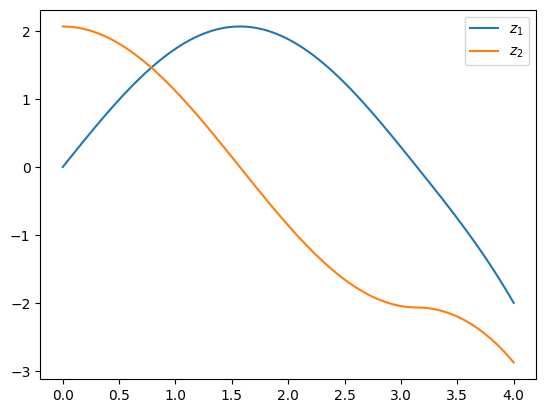

In [127]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode(t, z):
    return np.vstack((z[1], -np.abs(z[0])))

def bc(za, zb):
    return np.array([za[0], zb[0] + 2])

t_mesh = np.linspace(0, 4, 5)
z_guess = np.zeros((2, len(t_mesh)))

sol = solve_bvp(ode, bc, t_mesh, z_guess)
print(sol)

x_plot = np.linspace(0, 4, 100)
z_plot = sol.sol(x_plot)

plt.plot(x_plot, z_plot[0], label=r"$z_1$")
plt.plot(x_plot, z_plot[1], label=r"$z_2$")
plt.legend()
plt.show()


## Two-point boundary value problem solver

In [128]:
def free_final_time_2pbvp(a=1.0, b=1.0, N=20):
    # Indirect method (solving a two-point boundary value problem).

    def ode(t, x_p_tf):
        x1, x2, p1, p2, tf = x_p_tf
        return tf * np.array([x2, -p2 / b, np.zeros_like(t), -p1, np.zeros_like(t)])

    def boundary_conditions(x_p_tf_0, x_p_tf_N):
        x1_0, x2_0, p1_0, p2_0, tf_0 = x_p_tf_0
        x1_N, x2_N, p1_N, p2_N, tf_N = x_p_tf_N
        return np.array([x1_0 - 10, x2_0, x1_N, x2_N, a * tf_N - p2_N**2 / (2 * b)])

    return solve_bvp(
        fun=ode, 
        bc=boundary_conditions, 
        x=np.linspace(0, 1, N + 1),
        y=np.array([np.linspace(10, 0, N + 1),
                  np.zeros(N + 1),
                  np.zeros(N + 1),
                  np.zeros(N + 1),
                  np.ones(N + 1)]))

In [129]:
free_final_time_2pbvp()

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  1.667e-02 ...  9.833e-01  1.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x30cbbd260>
             p: None
             y: [[ 1.000e+01  9.992e+00 ...  8.241e-03  0.000e+00]
                 [-1.185e-19 -2.196e-01 ... -2.196e-01  0.000e+00]
                 ...
                 [ 2.993e+00  2.893e+00 ... -2.893e+00 -2.993e+00]
                 [ 4.478e+00  4.478e+00 ...  4.478e+00  4.478e+00]]
            yp: [[-5.306e-19 -9.833e-01 ... -9.833e-01  0.000e+00]
                 [-1.340e+01 -1.295e+01 ...  1.295e+01  1.340e+01]
                 ...
                 [-5.985e+00 -5.985e+00 ... -5.985e+00 -5.985e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
 rms_residuals: [ 3.002e-05  3.003e-05 ...  3.003e-05  3.002e-05]
         niter: 2

In [130]:
free_final_time_2pbvp().y[-1]

array([4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199, 4.47772199,
       4.47772199, 4.47772199, 4.47772199, 4.47772199])

## Exploring indirect single shooting

In [132]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax.experimental.ode import odeint

from ipywidgets import interact

In [133]:
def indirect_single_shooting_error(initial_costate_and_final_time, a=1.0, b=1.0):
    initial_state = np.array([10., 0.])
    initial_costate = initial_costate_and_final_time[:-1]
    final_time = initial_costate_and_final_time[-1]

    def shooting_ode(state_costate, t):
        (x1, x2), (p1, p2) = state_costate
        return jnp.array([x2, -p2 / b, 0, -p1])

    states, costates = odeint(shooting_ode, (initial_state, initial_costate), jnp.array([0, final_time]))
    return jnp.linalg.norm(jnp.append(states[-1], -costates[-1, 1]**2 / (2 * b) +  a * final_time))

In [134]:
vv_indirect_single_shooting_error = jax.jit(jax.vmap(jax.vmap(indirect_single_shooting_error)))
X, Y = np.meshgrid(np.linspace(-4, 8, 100), np.linspace(-4, 8, 100))


@interact
def plot_slice(final_time=(0.1, 8.0)):
    plt.figure(figsize=(12, 10))
    plt.contourf(X,
                 Y,
                #  vv_indirect_single_shooting_error(np.stack([X, Y, final_time * np.ones_like(X)], -1)))
                 np.log(1 + vv_indirect_single_shooting_error(np.stack([X, Y, final_time * np.ones_like(X)], -1))),
                 levels=40,
                 vmin=0,
                 vmax=10)
    plt.colorbar()

interactive(children=(FloatSlider(value=4.05, description='final_time', max=8.0, min=0.1), Output()), _dom_cla…